In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
#load the Data
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv
Saving ETH-USD.csv to ETH-USD.csv
Saving LTC-USD.csv to LTC-USD.csv


In [ ]:
# Store the data into dataframes
df_btc = pd.read_csv('BTC-USD.csv')
df_eth = pd.read_csv('ETH-USD.csv')
df_ltc = pd.read_csv('LTC-USD.csv')

In [ ]:
# Membuat kerangka data baru yang menyimpan harga penutupan ketiga mata uang kripto
df = pd.DataFrame({'BTC': df_btc['Adj Close'],
                   'ETH': df_eth['Adj Close'],
                   'LTC': df_ltc['Adj Close'],
    

})

In [ ]:
#show the new dataFrame
df

,BTC,ETH,LTC
0,43790.894531,2807.296631,140.597122
1,48116.941406,2853.143311,144.918625
2,47711.488281,3001.678955,153.147995
3,48199.953125,3307.516113,166.132202
4,49112.902344,3391.694336,169.258926
...,...,...,...
361,19222.671875,1317.993286,53.519299
362,19110.546875,1294.216797,52.632000
363,19426.720703,1335.320190,53.432064
364,19573.050781,1330.127686,52.737259


In [ ]:
#Get Statistics aon the data
df.describe()

,BTC,ETH,LTC
count,366.000000,366.000000,366.000000
mean,37743.943536,2700.757040,112.016998
std,13763.902340,1060.377286,54.131038
min,18547.400391,993.636780,43.300301
25%,23185.102539,1697.180481,60.422342
50%,39175.912110,2782.294067,107.794587
75%,46799.739258,3520.560547,147.656127
max,67566.828125,4812.087402,278.007507


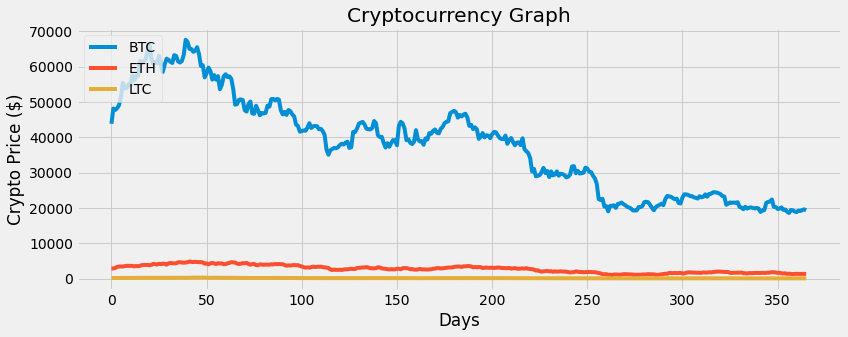

In [ ]:
#visualisasikan harga penutupan cryptocurrency
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [ ]:
#skala datanya
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)
scaled

array([[51.49691726, 47.49727129, 41.4545521 ],
       [60.32208531, 48.69793314, 43.2957836 ],
       [59.49495789, 52.58787853, 46.80201169],
       ...,
       [ 1.79382003,  8.94822125,  4.31676691],
       [ 2.09233448,  8.81223667,  4.02073637],
       [ 1.52989406,  8.26083041,  4.12277414]])

In [ ]:
#mengubah data yang diskalakan menjadi kerangka data
df_scale = pd.DataFrame(scaled, columns= df.columns)

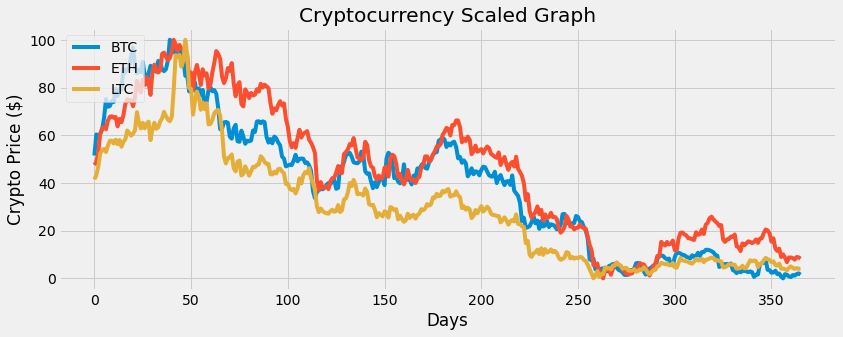

In [ ]:
#visualisasikan data yang diskalakan
my_crypto = df_scale

plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label=c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [ ]:
#get the daily simple return
DSR = df.pct_change()
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.098789,0.016331,0.030737
2,-0.008426,0.052060,0.056786
3,0.010238,0.101889,0.084782
4,0.018941,0.025451,0.018821
...,...,...,...
361,0.022368,-0.007729,-0.028507
362,-0.005833,-0.018040,-0.016579
363,0.016544,0.031759,0.015201
364,0.007532,-0.003889,-0.013004


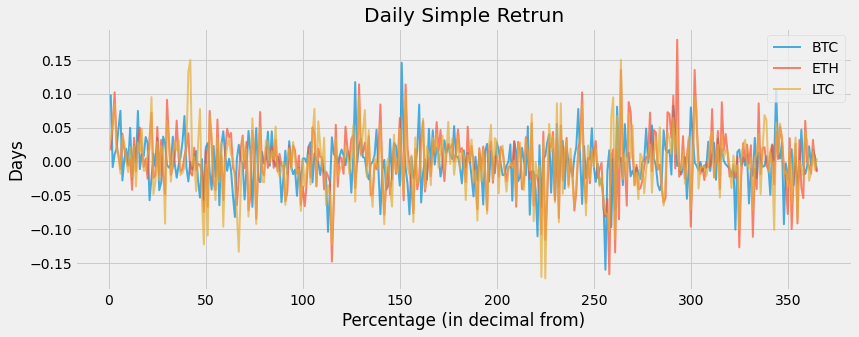

In [ ]:
#visualisasikan retrun sederhana setiap hari
plt.figure(figsize=(12.4, 4.5))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], label=c, lw = 2, alpha = .7)

plt.title('Daily Simple Retrun')
plt.xlabel('Percentage (in decimal from)')
plt.ylabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [ ]:
# Get the volatilit
print('The Cryptocurrency Volatility:')
DSR.std()

The Cryptocurrency Volatility:


BTC    0.034660
ETH    0.044493
LTC    0.045880
dtype: float64

In [ ]:
#tunjukkan mean / rata-rata retrun sederhana harian
DSR.mean()

BTC   -0.001639
ETH   -0.001095
LTC   -0.001606
dtype: float64

In [ ]:
#get the correlation
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.038918,0.037982
ETH,0.038918,1.000000,0.811198
LTC,0.037982,0.811198,1.000000


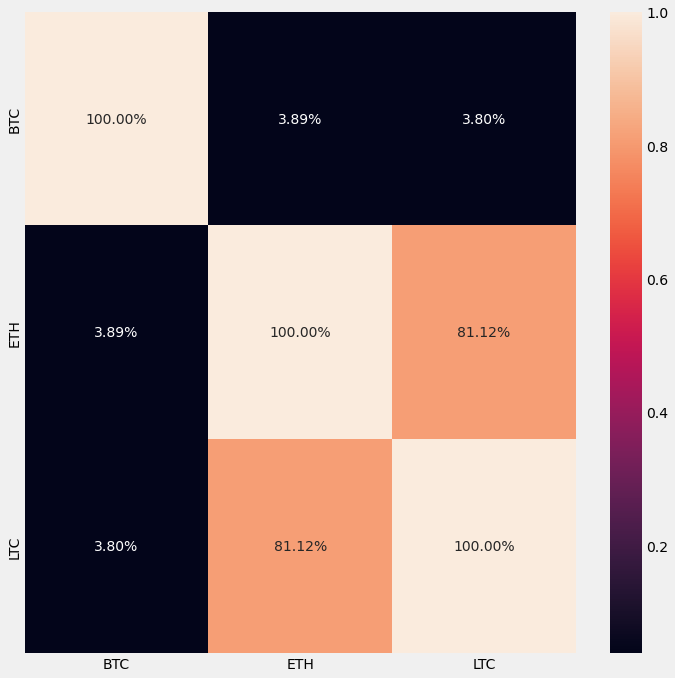

In [ ]:
#visualize the correlation
import seaborn as sns

plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

In [ ]:
#mendapatkan pengembalian sederhana kumulatif harian
DCSR = (DSR+1).cumprod()

#show
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,1.098789,1.016331,1.030737
2,1.089530,1.069242,1.089268
3,1.100684,1.178185,1.181619
4,1.121532,1.208171,1.203858
...,...,...,...
361,0.438965,0.469488,0.380657
362,0.436405,0.461019,0.374346
363,0.443625,0.475661,0.380037
364,0.446966,0.473811,0.375095


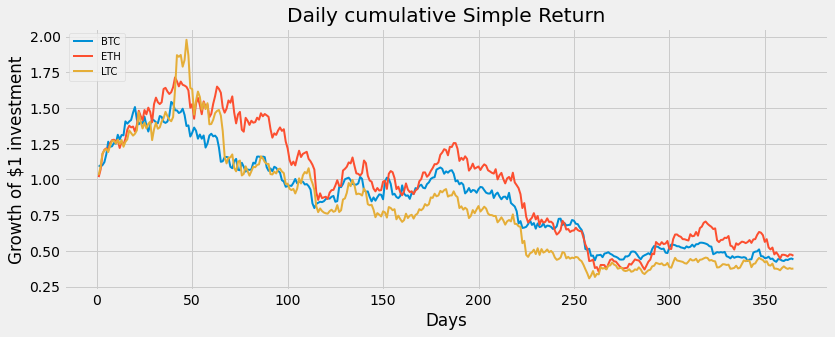

In [ ]:
#memvisualisasikan retrun sederhana kumulatif harian
plt.figure(figsize=(12.2, 4.5))

for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c],lw=2, label=c)

plt.title('Daily cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc= 'upper left', fontsize=10)
plt.show()